In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
462,8,74,70,40,49,35.3,0.705,39,0


In [7]:
df.iloc[10:51, 0:4]

,Pregnancies,Glucose,BloodPressure,SkinThickness
10,4,110,92,0
11,10,168,74,0
12,10,139,80,0
13,1,189,60,23
14,5,166,72,19
15,7,100,0,0
16,0,118,84,47
17,7,107,74,0
18,1,103,30,38
19,1,115,70,30


In [8]:
df.loc[[10,20,50], ['Pregnancies', 'BMI', 'Age']]

,Pregnancies,BMI,Age
10,4,37.6,30
20,3,39.3,27
50,1,19.4,22


In [9]:
df.shape

(768, 9)

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
df.isna().sum

<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                   

In [13]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [14]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
df.groupby(['BMI'])['Age'].value_counts()

BMI   Age
0.0   21     3
      22     2
      24     1
      25     1
      26     1
            ..
53.2  25     1
55.0  26     1
57.3  22     1
59.4  25     1
67.1  26     1
Name: count, Length: 708, dtype: int64

In [16]:
df.groupby(['Pregnancies'])['Age'].value_counts()

Pregnancies  Age
0            21     21
             22     17
             25     13
             24      9
             26      9
                    ..
13           57      1
14           38      1
             46      1
15           43      1
17           47      1
Name: count, Length: 292, dtype: int64

In [17]:
df.groupby(['BMI'])['Glucose'].value_counts()

BMI   Glucose
0.0   74         1
      80         1
      84         1
      94         1
      102        1
                ..
53.2  162        1
55.0  88         1
57.3  123        1
59.4  180        1
67.1  129        1
Name: count, Length: 749, dtype: int64

In [18]:
df.groupby(['BMI'])['BloodPressure'].value_counts()

BMI   BloodPressure
0.0   0                7
      64               1
      75               1
      82               1
      96               1
                      ..
53.2  76               1
55.0  30               1
57.3  100              1
59.4  78               1
67.1  110              1
Name: count, Length: 693, dtype: int64

In [19]:
df.groupby(['BMI'])['SkinThickness'].value_counts()

BMI   SkinThickness
0.0   0                9
      23               2
18.2  0                1
      15               1
      19               1
                      ..
53.2  56               1
55.0  42               1
57.3  35               1
59.4  63               1
67.1  46               1
Name: count, Length: 657, dtype: int64

In [20]:
df.groupby(['BMI'])['Insulin'].value_counts()	

BMI   Insulin
0.0   0          10
      89          1
18.2  0           2
      82          1
18.4  0           1
                 ..
53.2  100         1
55.0  99          1
57.3  240         1
59.4  14          1
67.1  130         1
Name: count, Length: 578, dtype: int64

In [21]:
df.groupby(['BMI'])['Outcome'].value_counts()

BMI   Outcome
0.0   0          9
      1          2
18.2  0          3
18.4  0          1
19.1  0          1
                ..
53.2  1          1
55.0  1          1
57.3  0          1
59.4  1          1
67.1  1          1
Name: count, Length: 358, dtype: int64

In [22]:
x = df.iloc[:, 4:-2]
x

,Insulin,BMI,DiabetesPedigreeFunction
0,0,33.6,0.627
1,0,26.6,0.351
2,0,23.3,0.672
3,94,28.1,0.167
4,168,43.1,2.288
...,...,...,...
763,180,32.9,0.171
764,0,36.8,0.340
765,112,26.2,0.245
766,0,30.1,0.349


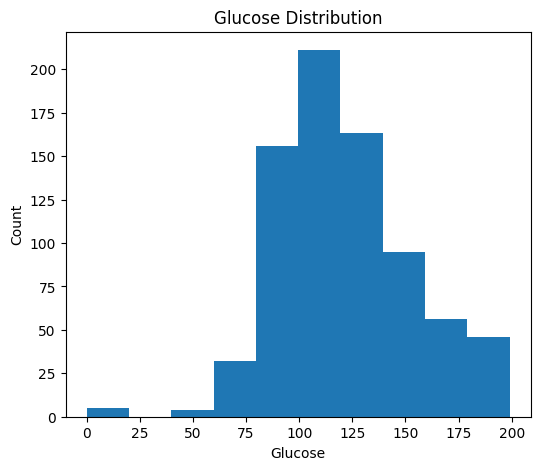

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist(df['Glucose'].dropna())
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.title("Glucose Distribution")
plt.show()

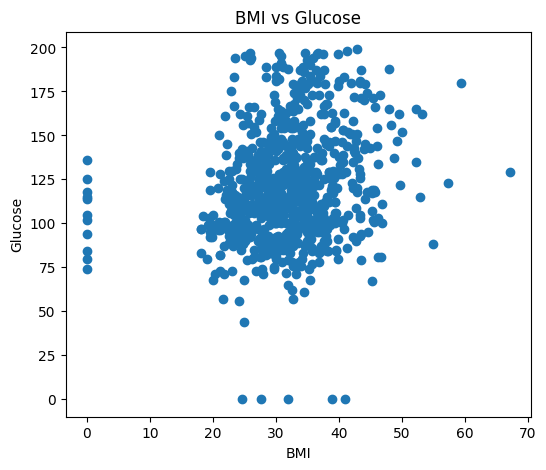

In [24]:
plt.figure(figsize=(6,5))
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("BMI vs Glucose")
plt.show()

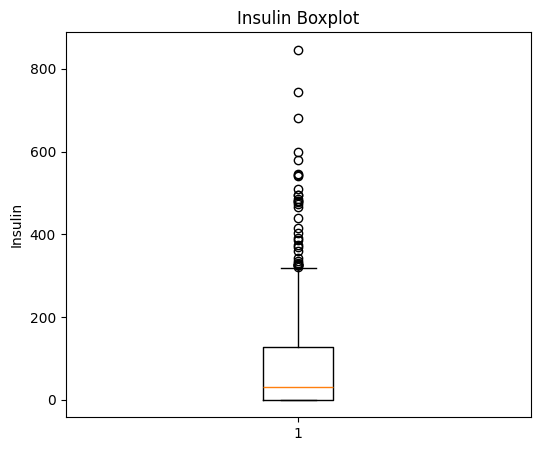

In [25]:
plt.figure(figsize=(6,5))
plt.boxplot(df['Insulin'].dropna())
plt.title("Insulin Boxplot")
plt.ylabel("Insulin")
plt.show()

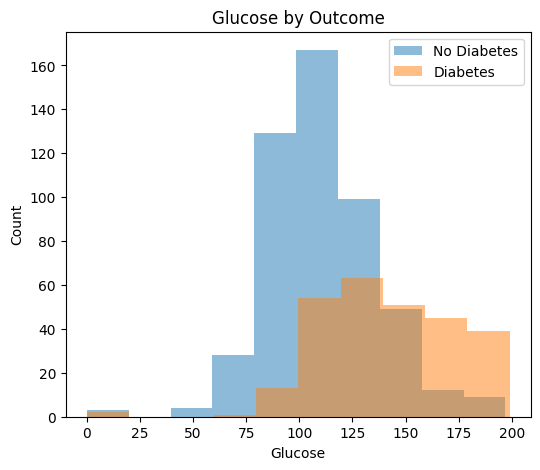

In [26]:
plt.figure(figsize=(6,5))
plt.hist(df[df['Outcome']==0]['Glucose'].dropna(), alpha=0.5, label='No Diabetes')
plt.hist(df[df['Outcome']==1]['Glucose'].dropna(), alpha=0.5, label='Diabetes')
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.title("Glucose by Outcome")
plt.legend()
plt.show()

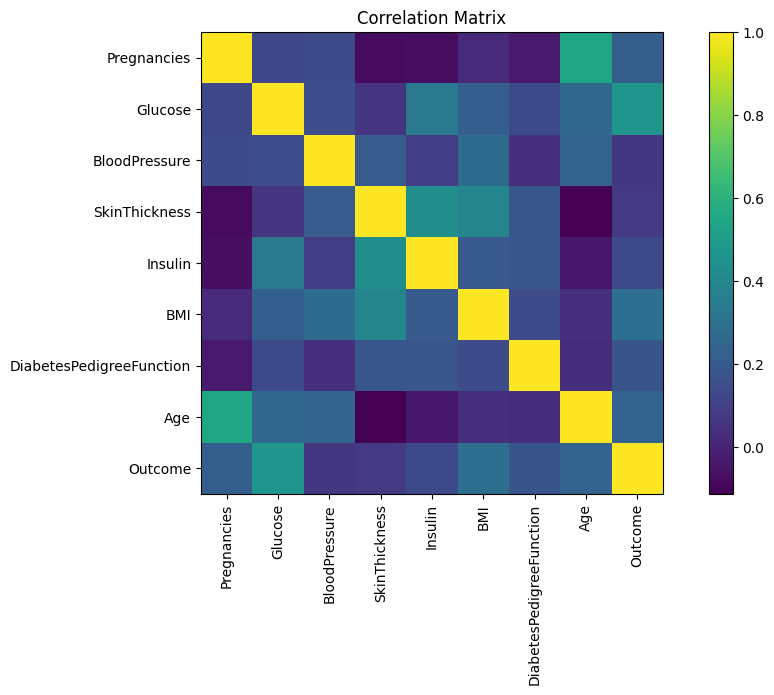

In [27]:
import numpy as np

plt.figure(figsize=(12,6))
corr = df.corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

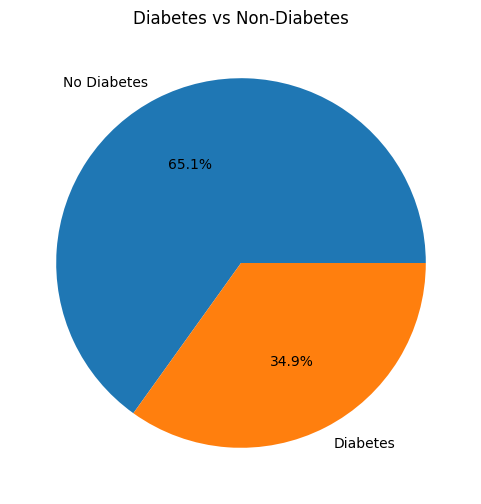

In [28]:
labels = ['No Diabetes', 'Diabetes']
sizes = df['Outcome'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Diabetes vs Non-Diabetes")
plt.show()

<Figure size 1000x500 with 0 Axes>

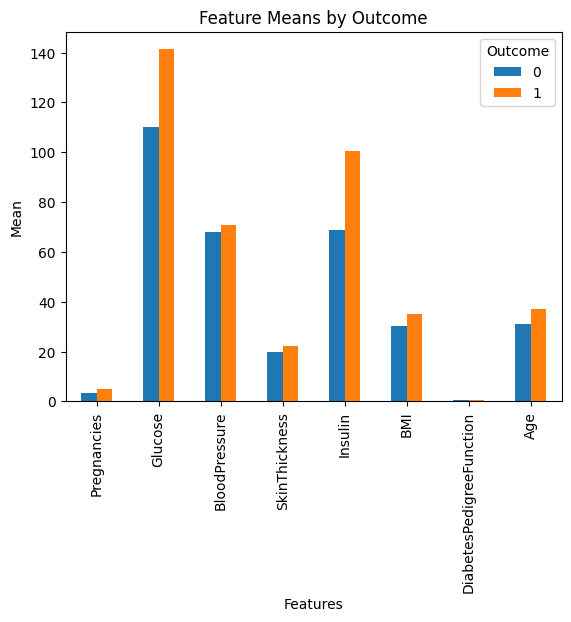

In [29]:
plt.figure(figsize=(10,5))
df.groupby('Outcome').mean().T.plot(kind='bar')
plt.title("Feature Means by Outcome")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.show()

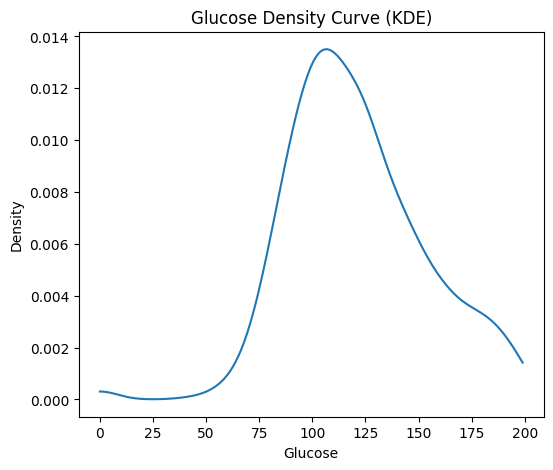

In [30]:
from scipy.stats import gaussian_kde
import numpy as np

glucose = df['Glucose'].dropna()
density = gaussian_kde(glucose)
xs = np.linspace(glucose.min(), glucose.max(), 300)

plt.figure(figsize=(6,5))
plt.plot(xs, density(xs))
plt.title("Glucose Density Curve (KDE)")
plt.xlabel("Glucose")
plt.ylabel("Density")
plt.show()

In [31]:
# identify invalid columns 
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

In [32]:
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [33]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:
# Fill missing values with median
for col in invalid_zero_cols:
    df[col] = df[col].fillna(df[col].median())

In [35]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
# feature scaling using standard scaler 
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_scaled = scaler.fit_transform(x)

In [40]:
# Convert Back to DataFrame
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [41]:
# verify scaling
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,5.782412e-18,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [42]:
# split train test
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
log_model = LogisticRegression(max_iter=1000)

In [47]:
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [48]:
y_pred = log_model.predict(X_test)


In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7532467532467533


In [50]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[82 17]
 [21 34]]


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

